# NFL Rush Defense, what is it good for

For this analysis we will be using play by play from the last 5 NFL seasons (2014 to 2018).  This data is turned into CSV by the nflscrapR project https://github.com/maksimhorowitz/nflscrapR.

In [1]:
# pull in and configure the tools we are going to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
pd.options.display.max_columns = None

### Pull in all our data
We are using precompiled data from https://github.com/ryurko/nflscrapR-data/

### Game Data

In [2]:
games_df = pd.concat([
    pd.read_csv('https://github.com/ryurko/nflscrapR-data/raw/master/games_data/regular_season/reg_games_2018.csv'),
    pd.read_csv('https://github.com/ryurko/nflscrapR-data/raw/master/games_data/regular_season/reg_games_2017.csv'),
    pd.read_csv('https://github.com/ryurko/nflscrapR-data/raw/master/games_data/regular_season/reg_games_2016.csv'),
    pd.read_csv('https://github.com/ryurko/nflscrapR-data/raw/master/games_data/regular_season/reg_games_2015.csv'),
    pd.read_csv('https://github.com/ryurko/nflscrapR-data/raw/master/games_data/regular_season/reg_games_2014.csv'),
])


In [3]:
def team_rename(name):
    if name == "JAC":
        return "JAX"
    if name == "SD":
        return "LAC"
    if name == "STL":
        return "LA"
    return name

### Team name changes must be dealt with, we will use the new name in the old years
 * 2014,2015 JAC => JAX for 2016,2017,2018
 * 2014,2015,2016 SD => LAC for 2017,2018
 * 2014,2015 STL => LA for 2016,2017,2018

In [4]:
games_df['home_team'] = games_df['home_team'].apply(team_rename)
games_df['away_team'] = games_df['away_team'].apply(team_rename)

def game_won(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] < row['away_score']:
        return row['away_team']
    else:
        return "TIE"

games_df['winner'] = games_df.apply(game_won, axis=1)
games_df.head()

,type,game_id,home_team,away_team,week,season,state_of_game,game_url,home_score,away_score,winner
0,reg,2018090600,PHI,ATL,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,18,12,PHI
1,reg,2018090900,BAL,BUF,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,47,3,BAL
2,reg,2018090907,NYG,JAX,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,15,20,JAX
3,reg,2018090906,NO,TB,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,40,48,TB
4,reg,2018090905,NE,HOU,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,27,20,NE


### For the play by play data, we are going to remove the non run/pass plays, (qb spikes etc)

In [5]:
years = []
for x in range(2014, 2019):
    current = pd.read_csv('https://github.com/ryurko/nflscrapR-data/raw/master/play_by_play_data/regular_season/reg_pbp_%d.csv' % x)
    current['season'] = x
    years.append(current)

pbp_raw_df = pd.concat(years, sort=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,203,204,205,231,232,233,238,240,241) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (42,166,167,174,175,178,179,182,183,188,189,203,204,205,231,232,233,238,240,241) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,199,200,204,205,206,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interact

In [6]:
plays_per_season = pbp_raw_df.groupby(['season']).count()[['play_id']]
plays_per_season.columns = ['Plays per season']
plays_per_season


,Plays per season
season,
2014,45502
2015,46129
2016,45736
2017,45244
2018,45143


In [7]:


pbp_raw_df["posteam"] = pbp_raw_df["posteam"].apply(team_rename)
pbp_raw_df["defteam"] = pbp_raw_df["defteam"].apply(team_rename)


In [8]:
pbp_raw_df['play_type'].unique()

array(['kickoff', 'run', 'no_play', 'pass', 'punt', 'field_goal',
       'extra_point', nan, 'qb_kneel', 'qb_spike'], dtype=object)

In [9]:
condition = (pbp_raw_df['play_type'] == "run")
pbp_df = pbp_raw_df[condition]

pbp_df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackl

# Measuring a rush defense

Some ways we might measure a rush defense are

 * yards per play, game, season
 * epa per play, game, season
 * if it holds a rushing offense to lower yards per play/game than its season average without the measured game in that average
 
Now I think the yards options likely aren't a super useful measure of anything.  But the version where we use them in combination with oppenent averages has a chance to be useful.
 
# Yards per play


In [10]:
runs_by_season_team_raw = pbp_df.groupby(['season', 'defteam']).mean()[['yards_gained']]
runs_by_season_team_raw.columns = ['Avg Yrds']
runs_by_season_team = runs_by_season_team_raw.unstack()
runs_by_season_team.loc['Team Avg'] = runs_by_season_team.mean(axis=0)
runs_by_season_team['NFL Avg'] = runs_by_season_team.mean(axis=1)
runs_by_season_team

Avg Yrds                                                    \
defteam        ARI       ATL       BAL       BUF       CAR       CHI   
season                                                                 
2014      4.538860  4.356818  3.704188  4.225490  4.692708  4.522277   
2015      4.000000  4.216958  4.123153  4.674667  3.922652  4.622328   
2016      3.704600  4.703601  3.842667  4.707692  4.079670  4.629108   
2017      3.579602  4.316195  4.247664  4.540541  4.154519  4.207729   
2018      4.972112  5.072864  3.847262  4.382075  4.879357  3.775811   
Team Avg  4.159035  4.533287  3.952987  4.506093  4.345781  4.351451   

                                                                      \
defteam        CIN       CLE       DAL       DEN       DET        GB   
season                                                                 
2014      4.304147  4.636735  4.328982  3.715942  3.250000  4.314351   
2015      4.368732  4.659910  4.436364  3.395466  4.393720  4.575540   
2016      4.556110  4.712526  3.946746  4.473348  4.589333  4.159892   
2017      4.257261  3.566964  4.307692  3.501211  4.346890  4.011086   
2018      4.913525  4.857143  3.907928  4.689320  4.553846  4.497674   
Team Avg  4.479955  4.486655  4.185542  3.955057  4.226758  4.311709   

                                                                      \
defteam        HOU       IND       JAX        KC        LA       LAC   
season                                                                 
2014      4.149877  4.401937  4.279167  4.880952  4.351220  4.536530   
2015      4.304813  4.482916  3.905405  4.174142  4.215103  4.970443   
2016      4.134021  4.866834  3.967742  4.553738  4.100244  4.000000   
2017      4.221957  4.140127  4.476077  4.381609  4.781022  4.941176   
2018      3.494737  4.014742  4.508353  5.057143  5.168421  4.356410   
Team Avg  4.061081  4.381311  4.227349  4.609517  4.523202  4.560912   

                                                                      \
defteam        MIA       MIN        NE        NO       NYG       NYJ   
season                                                                 
2014      4.399549  4.514943  4.125000  4.946759  5.165877  3.994695   
2015      4.184805  4.389027  4.053708  5.077670  4.544186  3.710744   
2016      5.022272  4.284289  3.890411  4.293194  3.675258  4.049261   
2017      4.326877  3.805634  4.847769  4.512563  4.391011  4.119565   
2018      5.019272  4.224537  4.997238  3.728324  4.481308  4.825059   
Team Avg  4.590555  4.243686  4.382825  4.511702  4.451528  4.139865   

                                                                      \
defteam        OAK       PHI       PIT       SEA        SF        TB   
season                                                                 
2014      4.174946  3.908096  4.458333  3.481283  4.138817  4.019824   
2015      4.236181  4.744541  3.954301  3.738636  4.280335  3.650224   
2016      4.590799  4.470588  4.409341  3.471132  5.045198  4.522782   
2017      4.217184  3.794562  4.464567  4.179954  3.985201  4.450704   
2018      4.943478  4.776074  4.314763  5.044321  4.325472  4.960494   
Team Avg  4.432518  4.338772  4.320261  3.983065  4.355004  4.320806   

                               NFL Avg  
defteam        TEN       WAS            
season                                  
2014      4.394309  4.191748  4.284511  
2015      4.138636  4.898010  4.282604  
2016      4.142029  4.627404  4.319432  
2017      3.676093  4.593074  4.229503  
2018      4.496403  4.744949  4.557201  
Team Avg  4.169494  4.611037  4.334650

In the graph below the dashed line is the 5 year NFL average
Remember lower is better

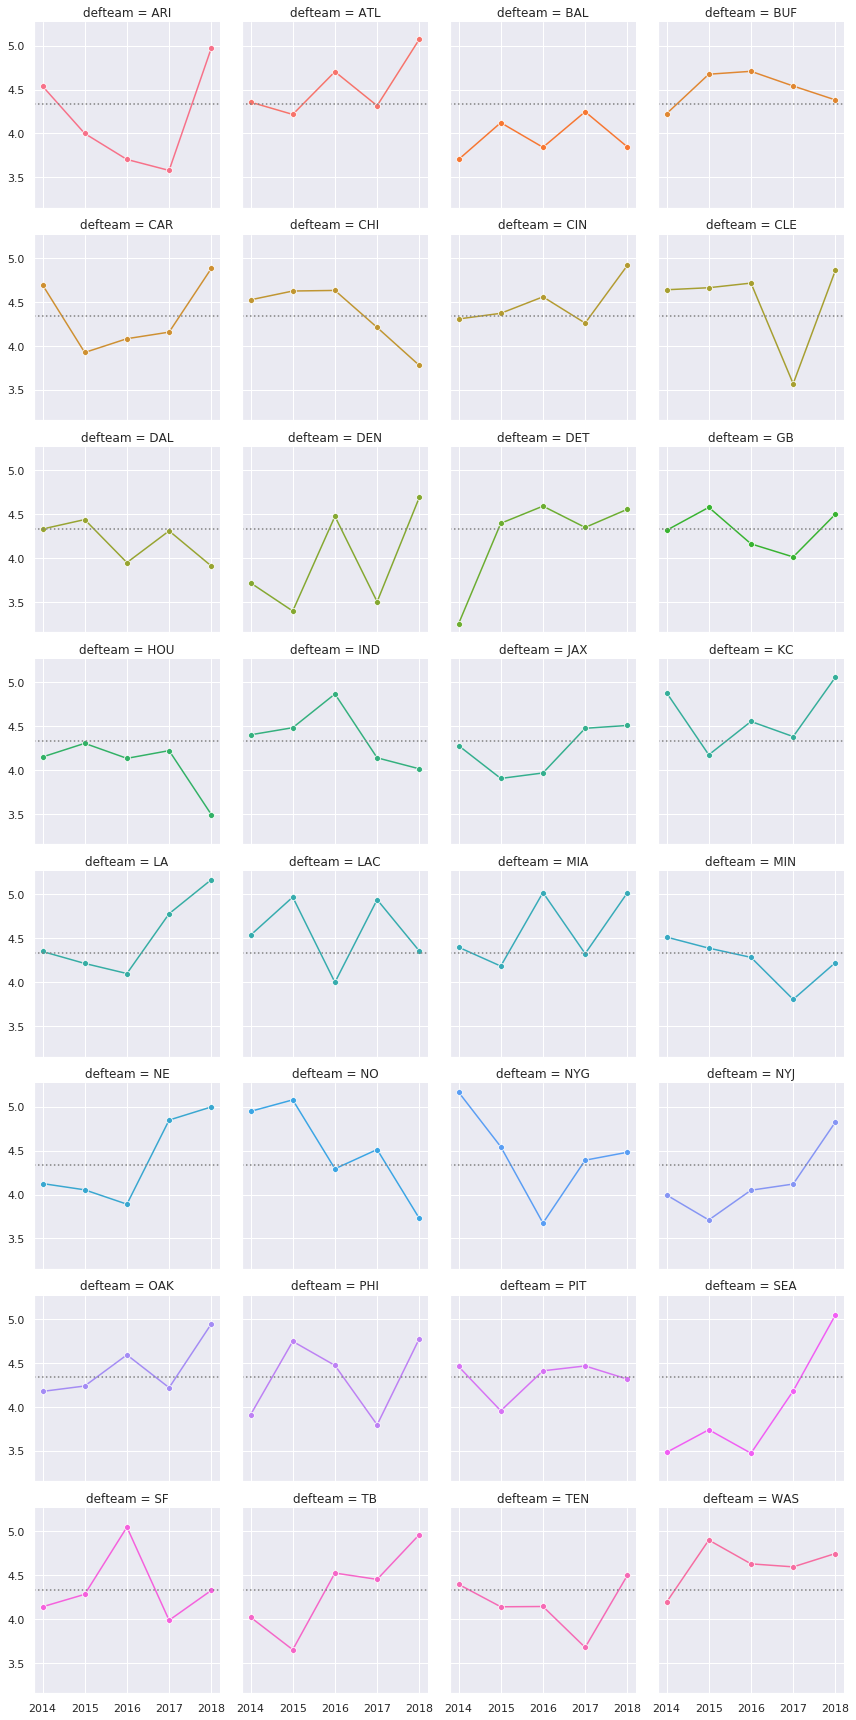

In [11]:
runs_by_season_team_plot = runs_by_season_team_raw.reset_index()
runs_by_season_team_plot['season'] = runs_by_season_team_plot['season'].apply(lambda x: "%s" % x) # stingify so stupid things arne't done to the axis in the graph
runs_by_season_team_plot
grid = sns.relplot(data=runs_by_season_team_plot, x="season", y="Avg Yrds", col="defteam", hue="defteam", height=3, col_wrap=4, kind="line", marker="o", legend=False)
#draw 5 year nfl average on each plot
grid.map(plt.axhline, y=runs_by_season_team['NFL Avg'].loc["Team Avg"], ls=":", c=".5")
grid

### Correlation to winning

In [32]:
wins_by_season_team = games_df.groupby(['season','winner']).count()[['game_id']]
wins_by_season_team.index.names = ['season','team']
wins_by_season_team.columns = ['wins']
wins_by_season_team.head()


wins
season team      
2014   ARI     11
       ATL      6
       BAL     10
       BUF      9
       CAR      7

In [33]:
runs_by_season_team_raw
runs_by_season_team_raw.index.names = ['season','team']

runs_by_season_team_with_wins = runs_by_season_team_raw.merge(wins_by_season_team, left_index=True, right_index=True)
runs_by_season_team_with_wins.head()

Avg Yrds  wins
season team                
2014   ARI   4.538860    11
       ATL   4.356818     6
       BAL   3.704188    10
       BUF   4.225490     9
       CAR   4.692708     7

In [34]:
runs_by_season_team_with_wins.corr()

,Avg Yrds,wins
Avg Yrds,1.000000,-0.212231
wins,-0.212231,1.000000


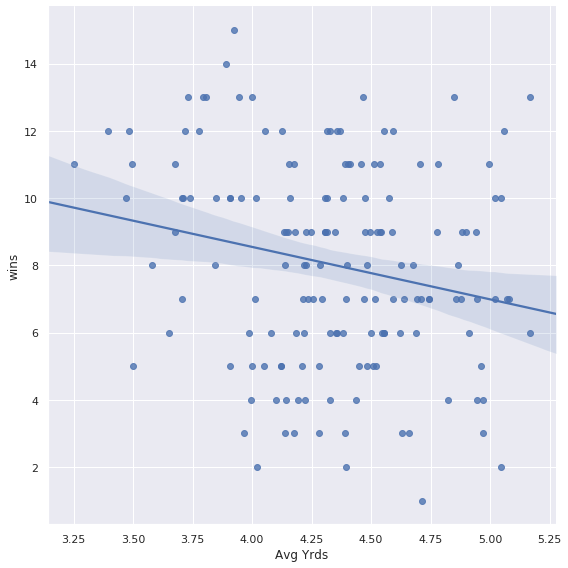

In [35]:
sns.lmplot(data=runs_by_season_team_with_wins, x="Avg Yrds", y="wins", height=8)



### Yards per play is not a predictor of wins
We have a small negative correlation, this means that as Avg Yards decreases, wins increases

The correlation is pretty low though, You can see how poor of a fit the linear regression is.

I'm not certain that its even valid to run a Pearson correlation with the large # of outliers, but assuming it is valid, a correlation at this level explains ~4% of the variance in wins.

https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide-2.php

## Correlation to Points allowed

In [39]:
score_differential_post





points
season team        
2014   ARI      310
       ATL      381
       BAL      409
       BUF      343
       CAR      339

In [40]:
runs_by_season_team_with_points = runs_by_season_team_raw.merge(points, left_index=True, right_index=True)
runs_by_season_team_with_points.head()

Avg Yrds  points
season team                  
2014   ARI   4.538860     310
       ATL   4.356818     381
       BAL   3.704188     409
       BUF   4.225490     343
       CAR   4.692708     339

In [41]:
runs_by_season_team_with_points.corr()

,Avg Yrds,points
Avg Yrds,1.000000,0.040079
points,0.040079,1.000000


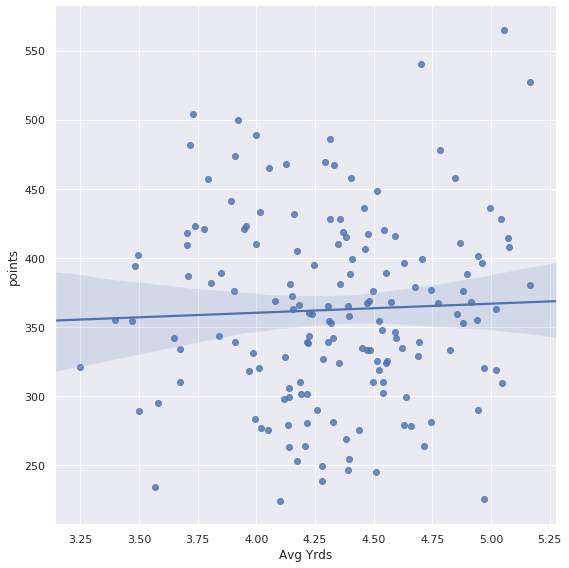

In [42]:
sns.lmplot(data=runs_by_season_team_with_points, x="Avg Yrds", y="points", height=8)


### Yards per play is not a predictor of points given up
We have a small negative correlation, this means that as Avg Yards decreases, wins increases

The correlation is pretty low though, You can see how poor of a fit the linear regression is.

I'm not certain that its even valid to run a Pearson correlation with the large # of outliers, but assuming it is valid, a correlation at this level explains ~4% of the variance in wins.

https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide-2.php